# 对汽车燃料效率建模

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, cross_validation, metrics
from sklearn import preprocessing
from tensorflow.contrib import learn
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model_year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


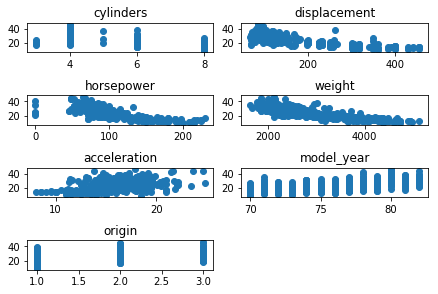

In [6]:
# 读取数据集
path = "/Users/sunlu/Workspaces/PyCharm/TensorflowDiary/MachineLearning/Nolinear/mpg.csv"
df = pd.read_csv(path, header=0)
print(df.head(5))

# 将排量的参数转化为浮点类型的数字
df['displacement'] = df['displacement'].astype(float)

# 从数据集中获取数据列，其中第一列（每加仑英里数）和最后一列（车名）将被忽略
X = df[df.columns[1:8]]
y = df['mpg']

# 进行原始数据展示
plt.figure() # 创建一个新的图形
f, ax1 = plt.subplots()
for i in range(1, 8):
    number = 420 + i
    ax1.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]], y)# 绘制数据点的散点图
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [9]:
# 拆分数据集
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

# 缩放数据以进行收敛性优化
scaler = preprocessing.StandardScaler()

# 设置变换参数
X_train = scaler.fit_transform(X_train)

# 建立一个含有两层全连接的DNN网络，分别有十个和五个单元
model = Sequential()
model.add(Dense(10, input_dim = 7, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer = 'normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# 编译模型，将均方误差作为损失函数
model.compile(loss='mean_squared_error', optimizer='adam')

# 使用1000次训练匹配模型
model.fit(X_train, y_train, nb_epoch=1000, validation_split=0.33, shuffle=True, verbose=2)

# 准确度测试
score = metrics.mean_squared_error(model.predict(scaler.transform(X_test)), y_test)

print(" Total Mean Squared Error: " + str(score))

/Users/sunlu/anaconda/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 199 samples, validate on 99 samples
Epoch 1/1000


 - 0s - loss: 658.0704 - val_loss: 602.1940


Epoch 2/1000
 - 0s - loss: 657.5967 - val_loss: 601.7482


Epoch 3/1000
 - 0s - loss: 657.1137 - val_loss: 601.2489


Epoch 4/1000
 - 0s - loss: 656.5498 - val_loss: 600.6668


Epoch 5/1000
 - 0s - loss: 655.8727 - val_loss: 599.9584


Epoch 6/1000


 - 0s - loss: 655.0375 - val_loss: 599.0992


Epoch 7/1000


 - 0s - loss: 654.0311 - val_loss: 598.0187


Epoch 8/1000


 - 0s - loss: 652.7490 - val_loss: 596.6702


Epoch 9/1000


 - 0s - loss: 651.1451 - val_loss: 594.9846


Epoch 10/1000


 - 0s - loss: 649.0983 - val_loss: 592.9044


Epoch 11/1000
 - 0s - loss: 646.6000 - val_loss: 590.3313


Epoch 12/1000


 - 0s - loss: 643.5224 - val_loss: 587.1869


Epoch 13/1000
 - 0s - loss: 639.8078 - val_loss: 583.4018


Epoch 14/1000


 - 0s - loss: 635.3184 - val_loss: 578.9239


Epoch 15/1000
 - 0s - loss: 630.0042 - val_loss: 573.6198


Epoch 16/1000


 - 0s - loss: 623.8069 - val_loss: 567.4419


Epoch 17/1000


 - 0s - loss: 616.4375 - val_loss: 560.2964


Epoch 18/1000


 - 0s - loss: 608.2729 - val_loss: 551.9743


Epoch 19/1000


 - 0s - loss: 598.3544 - val_loss: 542.6507


Epoch 20/1000


 - 0s - loss: 587.6751 - val_loss: 532.1511


Epoch 21/1000


 - 0s - loss: 575.4967 - val_loss: 520.5840


Epoch 22/1000


 - 0s - loss: 562.0650 - val_loss: 507.9658


Epoch 23/1000


 - 0s - loss: 547.9253 - val_loss: 494.4537


Epoch 24/1000


 - 0s - loss: 532.3997 - val_loss: 479.8184


Epoch 25/1000


 - 0s - loss: 515.6033 - val_loss: 464.1758


Epoch 26/1000


 - 0s - loss: 498.1128 - val_loss: 447.5540


Epoch 27/1000


 - 0s - loss: 478.8616 - val_loss: 430.1824


Epoch 28/1000


 - 0s - loss: 458.8033 - val_loss: 412.0517


Epoch 29/1000


 - 0s - loss: 438.4864 - val_loss: 393.0673


Epoch 30/1000
 - 0s - loss: 417.0077 - val_loss: 373.4648


Epoch 31/1000


 - 0s - loss: 395.1936 - val_loss: 353.6188


Epoch 32/1000


 - 0s - loss: 372.4260 - val_loss: 334.0178


Epoch 33/1000


 - 0s - loss: 351.1196 - val_loss: 313.8860


Epoch 34/1000


 - 0s - loss: 328.4558 - val_loss: 293.9277


Epoch 35/1000
 - 0s - loss: 305.2959 - val_loss: 274.5660


Epoch 36/1000


 - 0s - loss: 283.8830 - val_loss: 254.7307


Epoch 37/1000


 - 0s - loss: 261.5392 - val_loss: 235.9506


Epoch 38/1000


 - 0s - loss: 240.4730 - val_loss: 218.0242


Epoch 39/1000


 - 0s - loss: 220.5717 - val_loss: 200.9824


Epoch 40/1000


 - 0s - loss: 201.6331 - val_loss: 185.1497


Epoch 41/1000


 - 0s - loss: 184.0165 - val_loss: 170.6010


Epoch 42/1000
 - 0s - loss: 167.5027 - val_loss: 157.1572


Epoch 43/1000


 - 0s - loss: 152.6102 - val_loss: 144.6801


Epoch 44/1000
 - 0s - loss: 138.4245 - val_loss: 133.3459


Epoch 45/1000


 - 0s - loss: 125.9481 - val_loss: 123.0531


Epoch 46/1000


 - 0s - loss: 114.8445 - val_loss: 114.0382


Epoch 47/1000
 - 0s - loss: 105.0419 - val_loss: 106.1941


Epoch 48/1000


 - 0s - loss: 96.5068 - val_loss: 99.5501


Epoch 49/1000


 - 0s - loss: 89.4464 - val_loss: 93.8251


Epoch 50/1000


 - 0s - loss: 83.5489 - val_loss: 88.7889


Epoch 51/1000


 - 0s - loss: 78.0671 - val_loss: 84.4557


Epoch 52/1000


 - 0s - loss: 73.7111 - val_loss: 80.8579


Epoch 53/1000


 - 0s - loss: 70.0631 - val_loss: 77.7472


Epoch 54/1000
 - 0s - loss: 66.8936 - val_loss: 75.1067


Epoch 55/1000


 - 0s - loss: 64.2892 - val_loss: 72.6987


Epoch 56/1000
 - 0s - loss: 61.9471 - val_loss: 70.5892


Epoch 57/1000


 - 0s - loss: 60.0408 - val_loss: 68.6795


Epoch 58/1000


 - 0s - loss: 58.2765 - val_loss: 67.1021


Epoch 59/1000


 - 0s - loss: 56.8888 - val_loss: 65.5939


Epoch 60/1000


 - 0s - loss: 55.6126 - val_loss: 64.2595


Epoch 61/1000


 - 0s - loss: 54.5090 - val_loss: 63.0234


Epoch 62/1000

 - 0s - loss: 53.4515 - val_loss: 61.8463


Epoch 63/1000


 - 0s - loss: 52.4763 - val_loss: 60.6306


Epoch 64/1000


 - 0s - loss: 51.4474 - val_loss: 59.4084


Epoch 65/1000


 - 0s - loss: 50.4837 - val_loss: 58.2200


Epoch 66/1000
 - 0s - loss: 49.5938 - val_loss: 57.0665


Epoch 67/1000


 - 0s - loss: 48.6308 - val_loss: 55.9446


Epoch 68/1000


 - 0s - loss: 47.8377 - val_loss: 54.7755


Epoch 69/1000


 - 0s - loss: 46.9126 - val_loss: 53.7497


Epoch 70/1000


 - 0s - loss: 46.1251 - val_loss: 52.7061


Epoch 71/1000


 - 0s - loss: 45.3236 - val_loss: 51.6171


Epoch 72/1000


 - 0s - loss: 44.5207 - val_loss: 50.5833


Epoch 73/1000


 - 0s - loss: 43.6944 - val_loss: 49.5370


Epoch 74/1000


 - 0s - loss: 42.8860 - val_loss: 48.4813


Epoch 75/1000


 - 0s - loss: 42.1038 - val_loss: 47.4047


Epoch 76/1000
 - 0s - loss: 41.3109 - val_loss: 46.4092


Epoch 77/1000


 - 0s - loss: 40.5636 - val_loss: 45.4542


Epoch 78/1000


 - 0s - loss: 39.8216 - val_loss: 44.5714


Epoch 79/1000


 - 0s - loss: 39.1395 - val_loss: 43.7089


Epoch 80/1000


 - 0s - loss: 38.4512 - val_loss: 42.8574


Epoch 81/1000


 - 0s - loss: 37.8260 - val_loss: 42.0120


Epoch 82/1000


 - 0s - loss: 37.1534 - val_loss: 41.1386


Epoch 83/1000
 - 0s - loss: 36.5276 - val_loss: 40.2944


Epoch 84/1000


 - 0s - loss: 35.8650 - val_loss: 39.5149


Epoch 85/1000
 - 0s - loss: 35.3281 - val_loss: 38.7643


Epoch 86/1000


 - 0s - loss: 34.7733 - val_loss: 38.0120


Epoch 87/1000
 - 0s - loss: 34.2078 - val_loss: 37.3267


Epoch 88/1000

 - 0s - loss: 33.6646 - val_loss: 36.5962


Epoch 89/1000


 - 0s - loss: 33.1547 - val_loss: 35.8965


Epoch 90/1000


 - 0s - loss: 32.6436 - val_loss: 35.2910


Epoch 91/1000


 - 0s - loss: 32.1891 - val_loss: 34.7006


Epoch 92/1000


 - 0s - loss: 31.7265 - val_loss: 34.1394


Epoch 93/1000


 - 0s - loss: 31.3168 - val_loss: 33.5746


Epoch 94/1000


 - 0s - loss: 30.9192 - val_loss: 33.0299


Epoch 95/1000


 - 0s - loss: 30.4733 - val_loss: 32.5199


Epoch 96/1000


 - 0s - loss: 30.0958 - val_loss: 32.0159


Epoch 97/1000


 - 0s - loss: 29.7321 - val_loss: 31.5478


Epoch 98/1000


 - 0s - loss: 29.3816 - val_loss: 31.0852


Epoch 99/1000

 - 0s - loss: 29.0143 - val_loss: 30.6291


Epoch 100/1000


 - 0s - loss: 28.6544 - val_loss: 30.1726


Epoch 101/1000
 - 0s - loss: 28.2810 - val_loss: 29.7141


Epoch 102/1000


 - 0s - loss: 27.9449 - val_loss: 29.2554


Epoch 103/1000


 - 0s - loss: 27.5953 - val_loss: 28.8260


Epoch 104/1000


 - 0s - loss: 27.2451 - val_loss: 28.4386


Epoch 105/1000


 - 0s - loss: 26.9257 - val_loss: 28.0536


Epoch 106/1000


 - 0s - loss: 26.6283 - val_loss: 27.6557


Epoch 107/1000


 - 0s - loss: 26.3288 - val_loss: 27.2889


Epoch 108/1000
 - 0s - loss: 26.0356 - val_loss: 26.9580


Epoch 109/1000
 - 0s - loss: 25.7716 - val_loss: 26.6605


Epoch 110/1000


 - 0s - loss: 25.5443 - val_loss: 26.3355


Epoch 111/1000


 - 0s - loss: 25.2615 - val_loss: 26.0422


Epoch 112/1000


 - 0s - loss: 25.0004 - val_loss: 25.6972


Epoch 113/1000


 - 0s - loss: 24.7409 - val_loss: 25.3532


Epoch 114/1000


 - 0s - loss: 24.4539 - val_loss: 25.0615


Epoch 115/1000


 - 0s - loss: 24.2104 - val_loss: 24.8070


Epoch 116/1000


 - 0s - loss: 23.9670 - val_loss: 24.5281


Epoch 117/1000


 - 0s - loss: 23.7231 - val_loss: 24.2629


Epoch 118/1000


 - 0s - loss: 23.5034 - val_loss: 23.9694


Epoch 119/1000
 - 0s - loss: 23.2586 - val_loss: 23.6595


Epoch 120/1000


 - 0s - loss: 23.0014 - val_loss: 23.3834


Epoch 121/1000
 - 0s - loss: 22.7855 - val_loss: 23.1580


Epoch 122/1000


 - 0s - loss: 22.5525 - val_loss: 22.8978


Epoch 123/1000


 - 0s - loss: 22.3328 - val_loss: 22.6251


Epoch 124/1000
 - 0s - loss: 22.1405 - val_loss: 22.3782


Epoch 125/1000
 - 0s - loss: 21.9558 - val_loss: 22.1607


Epoch 126/1000


 - 0s - loss: 21.7680 - val_loss: 21.9143


Epoch 127/1000


 - 0s - loss: 21.5515 - val_loss: 21.7134


Epoch 128/1000

 - 0s - loss: 21.3822 - val_loss: 21.4975


Epoch 129/1000


 - 0s - loss: 21.1789 - val_loss: 21.3080


Epoch 130/1000


 - 0s - loss: 20.9992 - val_loss: 21.1286


Epoch 131/1000


 - 0s - loss: 20.8130 - val_loss: 20.9572


Epoch 132/1000


 - 0s - loss: 20.6489 - val_loss: 20.8070


Epoch 133/1000


 - 0s - loss: 20.4862 - val_loss: 20.6172


Epoch 134/1000


 - 0s - loss: 20.3192 - val_loss: 20.4525


Epoch 135/1000


 - 0s - loss: 20.1557 - val_loss: 20.2614


Epoch 136/1000


 - 0s - loss: 19.9903 - val_loss: 20.0592


Epoch 137/1000


 - 0s - loss: 19.8060 - val_loss: 19.8075


Epoch 138/1000


 - 0s - loss: 19.6447 - val_loss: 19.5926


Epoch 139/1000


 - 0s - loss: 19.4991 - val_loss: 19.4037


Epoch 140/1000


 - 0s - loss: 19.3350 - val_loss: 19.1930


Epoch 141/1000


 - 0s - loss: 19.1795 - val_loss: 19.0227


Epoch 142/1000
 - 0s - loss: 19.0421 - val_loss: 18.8615


Epoch 143/1000


 - 0s - loss: 18.8992 - val_loss: 18.7064


Epoch 144/1000


 - 0s - loss: 18.7555 - val_loss: 18.5264


Epoch 145/1000
 - 0s - loss: 18.5488 - val_loss: 18.3964


Epoch 146/1000


 - 0s - loss: 18.3790 - val_loss: 18.3051


Epoch 147/1000


 - 0s - loss: 18.2358 - val_loss: 18.2061


Epoch 148/1000


 - 0s - loss: 18.1076 - val_loss: 18.1016


Epoch 149/1000


 - 0s - loss: 17.9401 - val_loss: 17.9195


Epoch 150/1000


 - 0s - loss: 17.7949 - val_loss: 17.7270


Epoch 151/1000


 - 0s - loss: 17.6287 - val_loss: 17.5615


Epoch 152/1000


 - 0s - loss: 17.4962 - val_loss: 17.4229


Epoch 153/1000


 - 0s - loss: 17.3511 - val_loss: 17.2562


Epoch 154/1000


 - 0s - loss: 17.2038 - val_loss: 17.0999


Epoch 155/1000


 - 0s - loss: 17.0862 - val_loss: 16.9578


Epoch 156/1000


 - 0s - loss: 16.9615 - val_loss: 16.8216


Epoch 157/1000


 - 0s - loss: 16.8319 - val_loss: 16.6802


Epoch 158/1000


 - 0s - loss: 16.7194 - val_loss: 16.5768


Epoch 159/1000
 - 0s - loss: 16.5864 - val_loss: 16.4256


Epoch 160/1000


 - 0s - loss: 16.4776 - val_loss: 16.2867


Epoch 161/1000


 - 0s - loss: 16.3377 - val_loss: 16.2082


Epoch 162/1000


 - 0s - loss: 16.2311 - val_loss: 16.1500


Epoch 163/1000
 - 0s - loss: 16.1115 - val_loss: 16.0955


Epoch 164/1000


 - 0s - loss: 15.9987 - val_loss: 16.0180


Epoch 165/1000


 - 0s - loss: 15.9035 - val_loss: 15.9110


Epoch 166/1000


 - 0s - loss: 15.7829 - val_loss: 15.7406


Epoch 167/1000

 - 0s - loss: 15.6749 - val_loss: 15.6401


Epoch 168/1000
 - 0s - loss: 15.5646 - val_loss: 15.5614


Epoch 169/1000


 - 0s - loss: 15.4501 - val_loss: 15.4424


Epoch 170/1000


 - 0s - loss: 15.3503 - val_loss: 15.3225


Epoch 171/1000


 - 0s - loss: 15.2442 - val_loss: 15.2272


Epoch 172/1000


 - 0s - loss: 15.1379 - val_loss: 15.1515


Epoch 173/1000


 - 0s - loss: 15.0607 - val_loss: 15.0757


Epoch 174/1000


 - 0s - loss: 14.9819 - val_loss: 15.0529


Epoch 175/1000


 - 0s - loss: 14.8864 - val_loss: 14.9869


Epoch 176/1000
 - 0s - loss: 14.7874 - val_loss: 14.8886


Epoch 177/1000


 - 0s - loss: 14.6994 - val_loss: 14.7616


Epoch 178/1000


 - 0s - loss: 14.6134 - val_loss: 14.6341


Epoch 179/1000
 - 0s - loss: 14.5304 - val_loss: 14.5341


Epoch 180/1000


 - 0s - loss: 14.4501 - val_loss: 14.3956


Epoch 181/1000


 - 0s - loss: 14.3672 - val_loss: 14.3022


Epoch 182/1000


 - 0s - loss: 14.2862 - val_loss: 14.2389


Epoch 183/1000


 - 0s - loss: 14.2244 - val_loss: 14.2057


Epoch 184/1000


 - 0s - loss: 14.1361 - val_loss: 14.1247


Epoch 185/1000


 - 0s - loss: 14.0590 - val_loss: 14.0444


Epoch 186/1000


 - 0s - loss: 13.9803 - val_loss: 13.9775


Epoch 187/1000


 - 0s - loss: 13.9141 - val_loss: 13.9103


Epoch 188/1000


 - 0s - loss: 13.8359 - val_loss: 13.8750


Epoch 189/1000
 - 0s - loss: 13.7667 - val_loss: 13.8367


Epoch 190/1000


 - 0s - loss: 13.7040 - val_loss: 13.7544


Epoch 191/1000


 - 0s - loss: 13.6315 - val_loss: 13.7125


Epoch 192/1000


 - 0s - loss: 13.5664 - val_loss: 13.6261


Epoch 193/1000


 - 0s - loss: 13.4848 - val_loss: 13.5800


Epoch 194/1000


 - 0s - loss: 13.4306 - val_loss: 13.5240


Epoch 195/1000


 - 0s - loss: 13.3883 - val_loss: 13.5110


Epoch 196/1000


 - 0s - loss: 13.3138 - val_loss: 13.4234


Epoch 197/1000


 - 0s - loss: 13.2518 - val_loss: 13.3314


Epoch 198/1000


 - 0s - loss: 13.1967 - val_loss: 13.2620


Epoch 199/1000


 - 0s - loss: 13.1529 - val_loss: 13.1965


Epoch 200/1000


 - 0s - loss: 13.0995 - val_loss: 13.1349


Epoch 201/1000


 - 0s - loss: 13.0533 - val_loss: 13.1135


Epoch 202/1000
 - 0s - loss: 12.9958 - val_loss: 13.0423


Epoch 203/1000
 - 0s - loss: 12.9498 - val_loss: 12.9738


Epoch 204/1000


 - 0s - loss: 12.9063 - val_loss: 12.8671


Epoch 205/1000


 - 0s - loss: 12.8496 - val_loss: 12.8200


Epoch 206/1000


 - 0s - loss: 12.7961 - val_loss: 12.7815


Epoch 207/1000


 - 0s - loss: 12.7387 - val_loss: 12.7564


Epoch 208/1000


 - 0s - loss: 12.6949 - val_loss: 12.7196


Epoch 209/1000


 - 0s - loss: 12.6456 - val_loss: 12.7141


Epoch 210/1000
 - 0s - loss: 12.5919 - val_loss: 12.6520


Epoch 211/1000


 - 0s - loss: 12.5480 - val_loss: 12.6319


Epoch 212/1000


 - 0s - loss: 12.5194 - val_loss: 12.6218


Epoch 213/1000


 - 0s - loss: 12.4807 - val_loss: 12.5602


Epoch 214/1000


 - 0s - loss: 12.4098 - val_loss: 12.3752


Epoch 215/1000


 - 0s - loss: 12.3890 - val_loss: 12.2051


Epoch 216/1000


 - 0s - loss: 12.3487 - val_loss: 12.1498


Epoch 217/1000


 - 0s - loss: 12.2925 - val_loss: 12.1300


Epoch 218/1000


 - 0s - loss: 12.2427 - val_loss: 12.0884


Epoch 219/1000
 - 0s - loss: 12.2350 - val_loss: 11.9221


Epoch 220/1000


 - 0s - loss: 12.1779 - val_loss: 11.8228


Epoch 221/1000


 - 0s - loss: 12.1336 - val_loss: 11.7969


Epoch 222/1000


 - 0s - loss: 12.0895 - val_loss: 11.7528


Epoch 223/1000


 - 0s - loss: 12.0464 - val_loss: 11.7240


Epoch 224/1000


 - 0s - loss: 11.9988 - val_loss: 11.7030


Epoch 225/1000


 - 0s - loss: 11.9521 - val_loss: 11.6955


Epoch 226/1000


 - 0s - loss: 11.9097 - val_loss: 11.6377


Epoch 227/1000


 - 0s - loss: 11.8636 - val_loss: 11.6021


Epoch 228/1000


 - 0s - loss: 11.8268 - val_loss: 11.5740


Epoch 229/1000


 - 0s - loss: 11.7907 - val_loss: 11.5405


Epoch 230/1000


 - 0s - loss: 11.7547 - val_loss: 11.5230


Epoch 231/1000


 - 0s - loss: 11.7294 - val_loss: 11.5637


Epoch 232/1000


 - 0s - loss: 11.6970 - val_loss: 11.4611


Epoch 233/1000


 - 0s - loss: 11.6761 - val_loss: 11.3255


Epoch 234/1000


 - 0s - loss: 11.6319 - val_loss: 11.2789


Epoch 235/1000


 - 0s - loss: 11.6075 - val_loss: 11.3043


Epoch 236/1000


 - 0s - loss: 11.5535 - val_loss: 11.3514


Epoch 237/1000

 - 0s - loss: 11.5170 - val_loss: 11.3387


Epoch 238/1000


 - 0s - loss: 11.5227 - val_loss: 11.1995


Epoch 239/1000


 - 0s - loss: 11.4520 - val_loss: 11.1689


Epoch 240/1000


 - 0s - loss: 11.4429 - val_loss: 11.1779


Epoch 241/1000


 - 0s - loss: 11.4042 - val_loss: 11.1714


Epoch 242/1000


 - 0s - loss: 11.3711 - val_loss: 11.1049


Epoch 243/1000


 - 0s - loss: 11.3404 - val_loss: 11.0549


Epoch 244/1000


 - 0s - loss: 11.3070 - val_loss: 11.0426


Epoch 245/1000


 - 0s - loss: 11.2784 - val_loss: 11.0068


Epoch 246/1000


 - 0s - loss: 11.2654 - val_loss: 10.9680


Epoch 247/1000


 - 0s - loss: 11.2358 - val_loss: 10.9604


Epoch 248/1000


 - 0s - loss: 11.2051 - val_loss: 10.8527


Epoch 249/1000


 - 0s - loss: 11.1842 - val_loss: 10.7990


Epoch 250/1000


 - 0s - loss: 11.1493 - val_loss: 10.8088


Epoch 251/1000


 - 0s - loss: 11.1212 - val_loss: 10.8593


Epoch 252/1000


 - 0s - loss: 11.0993 - val_loss: 10.8614


Epoch 253/1000


 - 0s - loss: 11.0826 - val_loss: 10.7759


Epoch 254/1000


 - 0s - loss: 11.0476 - val_loss: 10.7663


Epoch 255/1000


 - 0s - loss: 11.0179 - val_loss: 10.6826


Epoch 256/1000


 - 0s - loss: 11.0160 - val_loss: 10.5679


Epoch 257/1000


 - 0s - loss: 10.9685 - val_loss: 10.6018


Epoch 258/1000


 - 0s - loss: 10.9545 - val_loss: 10.6226


Epoch 259/1000


 - 0s - loss: 10.9126 - val_loss: 10.5482


Epoch 260/1000
 - 0s - loss: 10.8980 - val_loss: 10.4597


Epoch 261/1000


 - 0s - loss: 10.8829 - val_loss: 10.4022


Epoch 262/1000


 - 0s - loss: 10.8798 - val_loss: 10.3465


Epoch 263/1000


 - 0s - loss: 10.8530 - val_loss: 10.3360


Epoch 264/1000


 - 0s - loss: 10.8418 - val_loss: 10.3840


Epoch 265/1000


 - 0s - loss: 10.7934 - val_loss: 10.3885


Epoch 266/1000


 - 0s - loss: 10.7573 - val_loss: 10.2772


Epoch 267/1000


 - 0s - loss: 10.7438 - val_loss: 10.2374


Epoch 268/1000


 - 0s - loss: 10.7213 - val_loss: 10.2285


Epoch 269/1000


 - 0s - loss: 10.7098 - val_loss: 10.2731


Epoch 270/1000


 - 0s - loss: 10.6771 - val_loss: 10.2511


Epoch 271/1000


 - 0s - loss: 10.6570 - val_loss: 10.1411


Epoch 272/1000


 - 0s - loss: 10.6512 - val_loss: 10.1170


Epoch 273/1000


 - 0s - loss: 10.6412 - val_loss: 10.0616


Epoch 274/1000


 - 0s - loss: 10.6116 - val_loss: 10.1653


Epoch 275/1000
 - 0s - loss: 10.5991 - val_loss: 10.2090


Epoch 276/1000


 - 0s - loss: 10.5825 - val_loss: 10.1815


Epoch 277/1000


 - 0s - loss: 10.5634 - val_loss: 10.1832


Epoch 278/1000


 - 0s - loss: 10.5180 - val_loss: 10.0741


Epoch 279/1000


 - 0s - loss: 10.5102 - val_loss: 9.9764


Epoch 280/1000
 - 0s - loss: 10.4783 - val_loss: 9.9385


Epoch 281/1000


 - 0s - loss: 10.4793 - val_loss: 9.9487


Epoch 282/1000


 - 0s - loss: 10.4481 - val_loss: 9.9384


Epoch 283/1000


 - 0s - loss: 10.4347 - val_loss: 9.9462


Epoch 284/1000
 - 0s - loss: 10.4223 - val_loss: 9.8740


Epoch 285/1000


 - 0s - loss: 10.4010 - val_loss: 9.8077


Epoch 286/1000


 - 0s - loss: 10.3860 - val_loss: 9.7472


Epoch 287/1000

 - 0s - loss: 10.3704 - val_loss: 9.7127


Epoch 288/1000


 - 0s - loss: 10.3618 - val_loss: 9.7379


Epoch 289/1000


 - 0s - loss: 10.3324 - val_loss: 9.7539


Epoch 290/1000


 - 0s - loss: 10.3153 - val_loss: 9.7077


Epoch 291/1000


 - 0s - loss: 10.3044 - val_loss: 9.6810


Epoch 292/1000


 - 0s - loss: 10.2870 - val_loss: 9.6831


Epoch 293/1000


 - 0s - loss: 10.2932 - val_loss: 9.7485


Epoch 294/1000


 - 0s - loss: 10.2586 - val_loss: 9.7382


Epoch 295/1000


 - 0s - loss: 10.2403 - val_loss: 9.7409


Epoch 296/1000


 - 0s - loss: 10.2371 - val_loss: 9.7410


Epoch 297/1000


 - 0s - loss: 10.2143 - val_loss: 9.6920


Epoch 298/1000
 - 0s - loss: 10.2083 - val_loss: 9.6659


Epoch 299/1000


 - 0s - loss: 10.1913 - val_loss: 9.6213


Epoch 300/1000


 - 0s - loss: 10.1942 - val_loss: 9.5705


Epoch 301/1000


 - 0s - loss: 10.1724 - val_loss: 9.5288


Epoch 302/1000


 - 0s - loss: 10.1536 - val_loss: 9.5157


Epoch 303/1000


 - 0s - loss: 10.1297 - val_loss: 9.5595


Epoch 304/1000


 - 0s - loss: 10.1074 - val_loss: 9.5398


Epoch 305/1000
 - 0s - loss: 10.1030 - val_loss: 9.5549


Epoch 306/1000


 - 0s - loss: 10.0924 - val_loss: 9.4933


Epoch 307/1000


 - 0s - loss: 10.0693 - val_loss: 9.4382


Epoch 308/1000


 - 0s - loss: 10.0617 - val_loss: 9.4456


Epoch 309/1000


 - 0s - loss: 10.0338 - val_loss: 9.4329


Epoch 310/1000


 - 0s - loss: 10.0118 - val_loss: 9.4187


Epoch 311/1000


 - 0s - loss: 10.0191 - val_loss: 9.4298


Epoch 312/1000


 - 0s - loss: 9.9943 - val_loss: 9.3504


Epoch 313/1000


 - 0s - loss: 9.9840 - val_loss: 9.2892


Epoch 314/1000


 - 0s - loss: 9.9615 - val_loss: 9.2896


Epoch 315/1000
 - 0s - loss: 9.9523 - val_loss: 9.2661


Epoch 316/1000


 - 0s - loss: 9.9358 - val_loss: 9.2845


Epoch 317/1000

 - 0s - loss: 9.9301 - val_loss: 9.3865


Epoch 318/1000
 - 0s - loss: 9.9283 - val_loss: 9.4527


Epoch 319/1000


 - 0s - loss: 9.9512 - val_loss: 9.5281


Epoch 320/1000


 - 0s - loss: 9.9422 - val_loss: 9.3851


Epoch 321/1000


 - 0s - loss: 9.8761 - val_loss: 9.3333


Epoch 322/1000


 - 0s - loss: 9.8623 - val_loss: 9.2726


Epoch 323/1000


 - 0s - loss: 9.8308 - val_loss: 9.2018


Epoch 324/1000
 - 0s - loss: 9.8215 - val_loss: 9.1584


Epoch 325/1000
 - 0s - loss: 9.8020 - val_loss: 9.1452


Epoch 326/1000


 - 0s - loss: 9.7877 - val_loss: 9.1210


Epoch 327/1000
 - 0s - loss: 9.7861 - val_loss: 9.1560


Epoch 328/1000


 - 0s - loss: 9.7730 - val_loss: 9.1741


Epoch 329/1000


 - 0s - loss: 9.7694 - val_loss: 9.1658


Epoch 330/1000


 - 0s - loss: 9.7481 - val_loss: 9.1252


Epoch 331/1000


 - 0s - loss: 9.7278 - val_loss: 9.0997


Epoch 332/1000
 - 0s - loss: 9.7018 - val_loss: 8.9796


Epoch 333/1000
 - 0s - loss: 9.7084 - val_loss: 8.9601


Epoch 334/1000


 - 0s - loss: 9.6992 - val_loss: 8.9300


Epoch 335/1000
 - 0s - loss: 9.6825 - val_loss: 8.9148


Epoch 336/1000


 - 0s - loss: 9.6715 - val_loss: 8.9277


Epoch 337/1000
 - 0s - loss: 9.6913 - val_loss: 9.0398


Epoch 338/1000
 - 0s - loss: 9.6538 - val_loss: 9.0251


Epoch 339/1000


 - 0s - loss: 9.6300 - val_loss: 8.9690


Epoch 340/1000


 - 0s - loss: 9.6178 - val_loss: 8.8589


Epoch 341/1000

 - 0s - loss: 9.5954 - val_loss: 8.7642


Epoch 342/1000
 - 0s - loss: 9.5991 - val_loss: 8.6938


Epoch 343/1000


 - 0s - loss: 9.5750 - val_loss: 8.6923


Epoch 344/1000


 - 0s - loss: 9.5653 - val_loss: 8.6399


Epoch 345/1000
 - 0s - loss: 9.5798 - val_loss: 8.5899


Epoch 346/1000


 - 0s - loss: 9.5556 - val_loss: 8.6347


Epoch 347/1000


 - 0s - loss: 9.5329 - val_loss: 8.6252


Epoch 348/1000


 - 0s - loss: 9.5439 - val_loss: 8.6528


Epoch 349/1000
 - 0s - loss: 9.5033 - val_loss: 8.5958


Epoch 350/1000


 - 0s - loss: 9.5080 - val_loss: 8.5969


Epoch 351/1000


 - 0s - loss: 9.5091 - val_loss: 8.5818


Epoch 352/1000
 - 0s - loss: 9.4888 - val_loss: 8.6662


Epoch 353/1000


 - 0s - loss: 9.4689 - val_loss: 8.6663


Epoch 354/1000
 - 0s - loss: 9.4755 - val_loss: 8.6437


Epoch 355/1000
 - 0s - loss: 9.4807 - val_loss: 8.6153


Epoch 356/1000


 - 0s - loss: 9.4319 - val_loss: 8.7078


Epoch 357/1000


 - 0s - loss: 9.4519 - val_loss: 8.7665


Epoch 358/1000


 - 0s - loss: 9.4405 - val_loss: 8.6587


Epoch 359/1000


 - 0s - loss: 9.4206 - val_loss: 8.5779


Epoch 360/1000


 - 0s - loss: 9.4282 - val_loss: 8.4922


Epoch 361/1000


 - 0s - loss: 9.4073 - val_loss: 8.5082


Epoch 362/1000


 - 0s - loss: 9.3928 - val_loss: 8.5185


Epoch 363/1000


 - 0s - loss: 9.3949 - val_loss: 8.5325


Epoch 364/1000
 - 0s - loss: 9.3746 - val_loss: 8.4440


Epoch 365/1000


 - 0s - loss: 9.3669 - val_loss: 8.4265


Epoch 366/1000


 - 0s - loss: 9.3632 - val_loss: 8.4128


Epoch 367/1000
 - 0s - loss: 9.3523 - val_loss: 8.4432


Epoch 368/1000


 - 0s - loss: 9.3582 - val_loss: 8.4981


Epoch 369/1000


 - 0s - loss: 9.3418 - val_loss: 8.4834


Epoch 370/1000


 - 0s - loss: 9.3230 - val_loss: 8.4369


Epoch 371/1000


 - 0s - loss: 9.3130 - val_loss: 8.4086


Epoch 372/1000


 - 0s - loss: 9.3319 - val_loss: 8.4357


Epoch 373/1000
 - 0s - loss: 9.3077 - val_loss: 8.3180


Epoch 374/1000


 - 0s - loss: 9.2915 - val_loss: 8.3388


Epoch 375/1000


 - 0s - loss: 9.2804 - val_loss: 8.3556


Epoch 376/1000
 - 0s - loss: 9.2808 - val_loss: 8.3077


Epoch 377/1000
 - 0s - loss: 9.2673 - val_loss: 8.2698


Epoch 378/1000


 - 0s - loss: 9.2940 - val_loss: 8.3384


Epoch 379/1000


 - 0s - loss: 9.2534 - val_loss: 8.3197


Epoch 380/1000


 - 0s - loss: 9.2552 - val_loss: 8.2555


Epoch 381/1000


 - 0s - loss: 9.2469 - val_loss: 8.2474


Epoch 382/1000


 - 0s - loss: 9.2807 - val_loss: 8.0829


Epoch 383/1000

 - 0s - loss: 9.2386 - val_loss: 8.0525


Epoch 384/1000


 - 0s - loss: 9.2394 - val_loss: 8.1046


Epoch 385/1000


 - 0s - loss: 9.2200 - val_loss: 8.1248


Epoch 386/1000


 - 0s - loss: 9.1840 - val_loss: 8.2090


Epoch 387/1000
 - 0s - loss: 9.2018 - val_loss: 8.2368


Epoch 388/1000
 - 0s - loss: 9.2103 - val_loss: 8.2250


Epoch 389/1000


 - 0s - loss: 9.2040 - val_loss: 8.2198


Epoch 390/1000


 - 0s - loss: 9.2017 - val_loss: 8.1365


Epoch 391/1000
 - 0s - loss: 9.1971 - val_loss: 8.1633


Epoch 392/1000


 - 0s - loss: 9.1669 - val_loss: 8.0693


Epoch 393/1000
 - 0s - loss: 9.1797 - val_loss: 8.0997


Epoch 394/1000


 - 0s - loss: 9.1633 - val_loss: 8.1189


Epoch 395/1000


 - 0s - loss: 9.1548 - val_loss: 8.1240


Epoch 396/1000
 - 0s - loss: 9.1487 - val_loss: 7.9962


Epoch 397/1000


 - 0s - loss: 9.1380 - val_loss: 7.8966


Epoch 398/1000


 - 0s - loss: 9.1880 - val_loss: 7.8537


Epoch 399/1000
 - 0s - loss: 9.1826 - val_loss: 7.9284


Epoch 400/1000


 - 0s - loss: 9.1495 - val_loss: 7.8678


Epoch 401/1000


 - 0s - loss: 9.1441 - val_loss: 7.8862


Epoch 402/1000
 - 0s - loss: 9.1283 - val_loss: 7.9003


Epoch 403/1000
 - 0s - loss: 9.1020 - val_loss: 7.9084


Epoch 404/1000

 - 0s - loss: 9.1068 - val_loss: 7.9669


Epoch 405/1000


 - 0s - loss: 9.0989 - val_loss: 7.9211


Epoch 406/1000


 - 0s - loss: 9.0986 - val_loss: 7.9149


Epoch 407/1000


 - 0s - loss: 9.0855 - val_loss: 7.9838


Epoch 408/1000


 - 0s - loss: 9.0729 - val_loss: 7.9998


Epoch 409/1000
 - 0s - loss: 9.0710 - val_loss: 7.9102


Epoch 410/1000
 - 0s - loss: 9.0644 - val_loss: 7.9288


Epoch 411/1000


 - 0s - loss: 9.0460 - val_loss: 7.9719


Epoch 412/1000
 - 0s - loss: 9.0333 - val_loss: 8.0387


Epoch 413/1000


 - 0s - loss: 9.0545 - val_loss: 8.1635


Epoch 414/1000


 - 0s - loss: 9.0922 - val_loss: 8.2284


Epoch 415/1000


 - 0s - loss: 9.1384 - val_loss: 8.2387


Epoch 416/1000


 - 0s - loss: 9.0850 - val_loss: 8.0019


Epoch 417/1000


 - 0s - loss: 9.0436 - val_loss: 7.8435


Epoch 418/1000


 - 0s - loss: 9.0323 - val_loss: 7.8116


Epoch 419/1000


 - 0s - loss: 9.0146 - val_loss: 7.8593


Epoch 420/1000


 - 0s - loss: 9.0187 - val_loss: 7.9445


Epoch 421/1000


 - 0s - loss: 9.0191 - val_loss: 7.9671


Epoch 422/1000


 - 0s - loss: 9.0524 - val_loss: 7.8158


Epoch 423/1000


 - 0s - loss: 8.9812 - val_loss: 7.8453


Epoch 424/1000


 - 0s - loss: 8.9785 - val_loss: 7.8701


Epoch 425/1000


 - 0s - loss: 8.9866 - val_loss: 7.8516


Epoch 426/1000


 - 0s - loss: 8.9694 - val_loss: 7.8773


Epoch 427/1000


 - 0s - loss: 8.9711 - val_loss: 7.8763


Epoch 428/1000


 - 0s - loss: 8.9855 - val_loss: 7.8841


Epoch 429/1000


 - 0s - loss: 8.9925 - val_loss: 7.9148


Epoch 430/1000


 - 0s - loss: 8.9891 - val_loss: 7.7852


Epoch 431/1000


 - 0s - loss: 8.9473 - val_loss: 7.7276


Epoch 432/1000


 - 0s - loss: 8.9627 - val_loss: 7.7693


Epoch 433/1000
 - 0s - loss: 8.9600 - val_loss: 7.7179


Epoch 434/1000


 - 0s - loss: 8.9408 - val_loss: 7.6681


Epoch 435/1000
 - 0s - loss: 8.9358 - val_loss: 7.6908


Epoch 436/1000
 - 0s - loss: 8.9399 - val_loss: 7.6667


Epoch 437/1000


 - 0s - loss: 8.9169 - val_loss: 7.5927


Epoch 438/1000


 - 0s - loss: 8.9334 - val_loss: 7.5656


Epoch 439/1000


 - 0s - loss: 8.9112 - val_loss: 7.7049


Epoch 440/1000


 - 0s - loss: 8.9132 - val_loss: 7.7668


Epoch 441/1000


 - 0s - loss: 8.9191 - val_loss: 7.7600


Epoch 442/1000


 - 0s - loss: 8.8921 - val_loss: 7.6687


Epoch 443/1000


 - 0s - loss: 8.8852 - val_loss: 7.5888


Epoch 444/1000


 - 0s - loss: 8.8813 - val_loss: 7.5669


Epoch 445/1000


 - 0s - loss: 8.8809 - val_loss: 7.5187


Epoch 446/1000


 - 0s - loss: 8.8632 - val_loss: 7.5493


Epoch 447/1000


 - 0s - loss: 8.8486 - val_loss: 7.5674


Epoch 448/1000


 - 0s - loss: 8.8501 - val_loss: 7.5414


Epoch 449/1000


 - 0s - loss: 8.8410 - val_loss: 7.5623


Epoch 450/1000


 - 0s - loss: 8.8556 - val_loss: 7.6220


Epoch 451/1000


 - 0s - loss: 8.8313 - val_loss: 7.6049


Epoch 452/1000


 - 0s - loss: 8.8252 - val_loss: 7.5553


Epoch 453/1000


 - 0s - loss: 8.8164 - val_loss: 7.5402


Epoch 454/1000


 - 0s - loss: 8.8025 - val_loss: 7.5536


Epoch 455/1000
 - 0s - loss: 8.8286 - val_loss: 7.6717


Epoch 456/1000


 - 0s - loss: 8.7800 - val_loss: 7.5562


Epoch 457/1000


 - 0s - loss: 8.7792 - val_loss: 7.4960


Epoch 458/1000


 - 0s - loss: 8.7787 - val_loss: 7.5173


Epoch 459/1000


 - 0s - loss: 8.7767 - val_loss: 7.5791


Epoch 460/1000


 - 0s - loss: 8.7918 - val_loss: 7.6112


Epoch 461/1000


 - 0s - loss: 8.7653 - val_loss: 7.5731


Epoch 462/1000


 - 0s - loss: 8.7525 - val_loss: 7.6268


Epoch 463/1000


 - 0s - loss: 8.7586 - val_loss: 7.6278


Epoch 464/1000


 - 0s - loss: 8.7673 - val_loss: 7.6232


Epoch 465/1000


 - 0s - loss: 8.7593 - val_loss: 7.6104


Epoch 466/1000


 - 0s - loss: 8.7345 - val_loss: 7.5542


Epoch 467/1000


 - 0s - loss: 8.7465 - val_loss: 7.4514


Epoch 468/1000


 - 0s - loss: 8.7004 - val_loss: 7.4851


Epoch 469/1000


 - 0s - loss: 8.7202 - val_loss: 7.4699


Epoch 470/1000


 - 0s - loss: 8.7067 - val_loss: 7.3960


Epoch 471/1000


 - 0s - loss: 8.7115 - val_loss: 7.3335


Epoch 472/1000


 - 0s - loss: 8.6896 - val_loss: 7.3732


Epoch 473/1000


 - 0s - loss: 8.6933 - val_loss: 7.3948


Epoch 474/1000


 - 0s - loss: 8.6741 - val_loss: 7.3515


Epoch 475/1000


 - 0s - loss: 8.6603 - val_loss: 7.1953


Epoch 476/1000


 - 0s - loss: 8.6795 - val_loss: 7.1455


Epoch 477/1000


 - 0s - loss: 8.6716 - val_loss: 7.2066


Epoch 478/1000


 - 0s - loss: 8.6553 - val_loss: 7.2506


Epoch 479/1000


 - 0s - loss: 8.6537 - val_loss: 7.3387


Epoch 480/1000
 - 0s - loss: 8.6432 - val_loss: 7.2990


Epoch 481/1000


 - 0s - loss: 8.6476 - val_loss: 7.3076


Epoch 482/1000


 - 0s - loss: 8.6345 - val_loss: 7.3255


Epoch 483/1000


 - 0s - loss: 8.6509 - val_loss: 7.3136


Epoch 484/1000


 - 0s - loss: 8.6001 - val_loss: 7.4399


Epoch 485/1000


 - 0s - loss: 8.6372 - val_loss: 7.5129


Epoch 486/1000


 - 0s - loss: 8.6258 - val_loss: 7.3495


Epoch 487/1000


 - 0s - loss: 8.5900 - val_loss: 7.2465


Epoch 488/1000


 - 0s - loss: 8.6438 - val_loss: 7.2095


Epoch 489/1000
 - 0s - loss: 8.6411 - val_loss: 7.1944


Epoch 490/1000


 - 0s - loss: 8.6180 - val_loss: 7.2493


Epoch 491/1000


 - 0s - loss: 8.5839 - val_loss: 7.3107


Epoch 492/1000


 - 0s - loss: 8.5814 - val_loss: 7.3322


Epoch 493/1000
 - 0s - loss: 8.5835 - val_loss: 7.3781


Epoch 494/1000


 - 0s - loss: 8.5756 - val_loss: 7.3770


Epoch 495/1000


 - 0s - loss: 8.5936 - val_loss: 7.3021


Epoch 496/1000
 - 0s - loss: 8.5616 - val_loss: 7.2830


Epoch 497/1000


 - 0s - loss: 8.5945 - val_loss: 7.2078


Epoch 498/1000


 - 0s - loss: 8.5608 - val_loss: 7.2692


Epoch 499/1000


 - 0s - loss: 8.5864 - val_loss: 7.3771


Epoch 500/1000


 - 0s - loss: 8.5449 - val_loss: 7.2537


Epoch 501/1000


 - 0s - loss: 8.5545 - val_loss: 7.1325


Epoch 502/1000


 - 0s - loss: 8.6367 - val_loss: 7.1212


Epoch 503/1000


 - 0s - loss: 8.6137 - val_loss: 7.1551


Epoch 504/1000


 - 0s - loss: 8.5692 - val_loss: 7.1485


Epoch 505/1000


 - 0s - loss: 8.5442 - val_loss: 7.2910


Epoch 506/1000


 - 0s - loss: 8.5234 - val_loss: 7.3905


Epoch 507/1000


 - 0s - loss: 8.5324 - val_loss: 7.4013


Epoch 508/1000


 - 0s - loss: 8.5395 - val_loss: 7.4005


Epoch 509/1000


 - 0s - loss: 8.4982 - val_loss: 7.2119


Epoch 510/1000


 - 0s - loss: 8.5046 - val_loss: 7.1772


Epoch 511/1000


 - 0s - loss: 8.4972 - val_loss: 7.2013


Epoch 512/1000

 - 0s - loss: 8.4881 - val_loss: 7.2014


Epoch 513/1000


 - 0s - loss: 8.5104 - val_loss: 7.1825


Epoch 514/1000


 - 0s - loss: 8.4858 - val_loss: 7.2559


Epoch 515/1000


 - 0s - loss: 8.4615 - val_loss: 7.3829


Epoch 516/1000


 - 0s - loss: 8.4837 - val_loss: 7.3827


Epoch 517/1000


 - 0s - loss: 8.4793 - val_loss: 7.3533


Epoch 518/1000


 - 0s - loss: 8.4729 - val_loss: 7.3401


Epoch 519/1000
 - 0s - loss: 8.4734 - val_loss: 7.3850


Epoch 520/1000


 - 0s - loss: 8.4800 - val_loss: 7.4263


Epoch 521/1000


 - 0s - loss: 8.4841 - val_loss: 7.4543


Epoch 522/1000


 - 0s - loss: 8.4808 - val_loss: 7.3971


Epoch 523/1000
 - 0s - loss: 8.4763 - val_loss: 7.3190


Epoch 524/1000


 - 0s - loss: 8.4455 - val_loss: 7.2762


Epoch 525/1000


 - 0s - loss: 8.4334 - val_loss: 7.3229


Epoch 526/1000


 - 0s - loss: 8.4435 - val_loss: 7.3080


Epoch 527/1000


 - 0s - loss: 8.4353 - val_loss: 7.2755


Epoch 528/1000
 - 0s - loss: 8.4283 - val_loss: 7.2403


Epoch 529/1000
 - 0s - loss: 8.4456 - val_loss: 7.1299


Epoch 530/1000


 - 0s - loss: 8.4263 - val_loss: 7.1653


Epoch 531/1000


 - 0s - loss: 8.4278 - val_loss: 7.2821


Epoch 532/1000


 - 0s - loss: 8.4704 - val_loss: 7.3221


Epoch 533/1000
 - 0s - loss: 8.4647 - val_loss: 7.2284


Epoch 534/1000


 - 0s - loss: 8.4248 - val_loss: 7.1580


Epoch 535/1000


 - 0s - loss: 8.4426 - val_loss: 7.1144


Epoch 536/1000
 - 0s - loss: 8.4034 - val_loss: 7.1911


Epoch 537/1000


 - 0s - loss: 8.3985 - val_loss: 7.2610


Epoch 538/1000


 - 0s - loss: 8.4262 - val_loss: 7.3173


Epoch 539/1000


 - 0s - loss: 8.3990 - val_loss: 7.2149


Epoch 540/1000


 - 0s - loss: 8.3888 - val_loss: 7.1625


Epoch 541/1000


 - 0s - loss: 8.4205 - val_loss: 7.1100


Epoch 542/1000


 - 0s - loss: 8.4069 - val_loss: 7.0581


Epoch 543/1000


 - 0s - loss: 8.4157 - val_loss: 7.0976


Epoch 544/1000


 - 0s - loss: 8.3918 - val_loss: 7.0383


Epoch 545/1000


 - 0s - loss: 8.3991 - val_loss: 7.0400


Epoch 546/1000


 - 0s - loss: 8.3961 - val_loss: 7.1286


Epoch 547/1000


 - 0s - loss: 8.3874 - val_loss: 7.1653


Epoch 548/1000


 - 0s - loss: 8.3780 - val_loss: 7.1427


Epoch 549/1000


 - 0s - loss: 8.3662 - val_loss: 7.0984


Epoch 550/1000

 - 0s - loss: 8.3876 - val_loss: 7.0526


Epoch 551/1000


 - 0s - loss: 8.4072 - val_loss: 7.0641


Epoch 552/1000


 - 0s - loss: 8.4000 - val_loss: 7.0722


Epoch 553/1000
 - 0s - loss: 8.3733 - val_loss: 7.1787


Epoch 554/1000


 - 0s - loss: 8.3728 - val_loss: 7.3161


Epoch 555/1000
 - 0s - loss: 8.3824 - val_loss: 7.2933


Epoch 556/1000


 - 0s - loss: 8.3536 - val_loss: 7.1310


Epoch 557/1000


 - 0s - loss: 8.3582 - val_loss: 7.0908


Epoch 558/1000


 - 0s - loss: 8.3558 - val_loss: 7.1330


Epoch 559/1000


 - 0s - loss: 8.3479 - val_loss: 7.2085


Epoch 560/1000


 - 0s - loss: 8.3532 - val_loss: 7.3318


Epoch 561/1000


 - 0s - loss: 8.3857 - val_loss: 7.2972


Epoch 562/1000


 - 0s - loss: 8.3508 - val_loss: 7.1810


Epoch 563/1000


 - 0s - loss: 8.3501 - val_loss: 7.1656


Epoch 564/1000


 - 0s - loss: 8.3493 - val_loss: 7.1398


Epoch 565/1000


 - 0s - loss: 8.3437 - val_loss: 7.1788


Epoch 566/1000


 - 0s - loss: 8.3737 - val_loss: 7.1973


Epoch 567/1000


 - 0s - loss: 8.3404 - val_loss: 7.1308


Epoch 568/1000


 - 0s - loss: 8.3311 - val_loss: 7.1255


Epoch 569/1000


 - 0s - loss: 8.3425 - val_loss: 7.1362


Epoch 570/1000


 - 0s - loss: 8.3228 - val_loss: 7.1706


Epoch 571/1000


 - 0s - loss: 8.3133 - val_loss: 7.2052


Epoch 572/1000


 - 0s - loss: 8.3300 - val_loss: 7.3058


Epoch 573/1000
 - 0s - loss: 8.3375 - val_loss: 7.3861


Epoch 574/1000


 - 0s - loss: 8.3314 - val_loss: 7.3439


Epoch 575/1000


 - 0s - loss: 8.3318 - val_loss: 7.2546


Epoch 576/1000
 - 0s - loss: 8.3189 - val_loss: 7.2998


Epoch 577/1000


 - 0s - loss: 8.3132 - val_loss: 7.2614


Epoch 578/1000


 - 0s - loss: 8.2990 - val_loss: 7.2050


Epoch 579/1000


 - 0s - loss: 8.3139 - val_loss: 7.1176


Epoch 580/1000


 - 0s - loss: 8.2815 - val_loss: 7.1960


Epoch 581/1000


 - 0s - loss: 8.3176 - val_loss: 7.3731


Epoch 582/1000


 - 0s - loss: 8.4140 - val_loss: 7.4387


Epoch 583/1000


 - 0s - loss: 8.3375 - val_loss: 7.1708


Epoch 584/1000


 - 0s - loss: 8.2655 - val_loss: 7.1006


Epoch 585/1000


 - 0s - loss: 8.2807 - val_loss: 7.0365


Epoch 586/1000


 - 0s - loss: 8.2965 - val_loss: 7.0082


Epoch 587/1000


 - 0s - loss: 8.2728 - val_loss: 7.0710


Epoch 588/1000


 - 0s - loss: 8.2781 - val_loss: 7.0539


Epoch 589/1000
 - 0s - loss: 8.2416 - val_loss: 7.1959


Epoch 590/1000


 - 0s - loss: 8.2797 - val_loss: 7.2269


Epoch 591/1000


 - 0s - loss: 8.3067 - val_loss: 7.2989


Epoch 592/1000


 - 0s - loss: 8.3331 - val_loss: 7.3451


Epoch 593/1000


 - 0s - loss: 8.2798 - val_loss: 7.2202


Epoch 594/1000


 - 0s - loss: 8.2382 - val_loss: 7.1252


Epoch 595/1000


 - 0s - loss: 8.2675 - val_loss: 7.0178


Epoch 596/1000


 - 0s - loss: 8.2038 - val_loss: 7.1635


Epoch 597/1000
 - 0s - loss: 8.2570 - val_loss: 7.2996


Epoch 598/1000
 - 0s - loss: 8.2617 - val_loss: 7.2387


Epoch 599/1000


 - 0s - loss: 8.2793 - val_loss: 7.0704


Epoch 600/1000


 - 0s - loss: 8.2046 - val_loss: 7.1412


Epoch 601/1000
 - 0s - loss: 8.2352 - val_loss: 7.2416


Epoch 602/1000


 - 0s - loss: 8.2183 - val_loss: 7.2584


Epoch 603/1000


 - 0s - loss: 8.2174 - val_loss: 7.2417


Epoch 604/1000


 - 0s - loss: 8.2125 - val_loss: 7.2424


Epoch 605/1000


 - 0s - loss: 8.2140 - val_loss: 7.2726


Epoch 606/1000


 - 0s - loss: 8.1962 - val_loss: 7.2139


Epoch 607/1000


 - 0s - loss: 8.1964 - val_loss: 7.2604


Epoch 608/1000


 - 0s - loss: 8.1952 - val_loss: 7.2764


Epoch 609/1000


 - 0s - loss: 8.1827 - val_loss: 7.2547


Epoch 610/1000

 - 0s - loss: 8.1788 - val_loss: 7.1810


Epoch 611/1000


 - 0s - loss: 8.2066 - val_loss: 7.1295


Epoch 612/1000


 - 0s - loss: 8.1714 - val_loss: 7.1649


Epoch 613/1000


 - 0s - loss: 8.1678 - val_loss: 7.1692


Epoch 614/1000


 - 0s - loss: 8.1650 - val_loss: 7.2060


Epoch 615/1000


 - 0s - loss: 8.1557 - val_loss: 7.1838


Epoch 616/1000


 - 0s - loss: 8.1559 - val_loss: 7.2067


Epoch 617/1000


 - 0s - loss: 8.1582 - val_loss: 7.1878


Epoch 618/1000


 - 0s - loss: 8.2123 - val_loss: 7.1326


Epoch 619/1000
 - 0s - loss: 8.2308 - val_loss: 7.2506


Epoch 620/1000


 - 0s - loss: 8.1632 - val_loss: 7.1083


Epoch 621/1000


 - 0s - loss: 8.1833 - val_loss: 7.1060


Epoch 622/1000


 - 0s - loss: 8.1830 - val_loss: 7.1951


Epoch 623/1000


 - 0s - loss: 8.1497 - val_loss: 7.2693


Epoch 624/1000


 - 0s - loss: 8.1565 - val_loss: 7.3127


Epoch 625/1000


 - 0s - loss: 8.1677 - val_loss: 7.1795


Epoch 626/1000


 - 0s - loss: 8.1416 - val_loss: 7.2387


Epoch 627/1000


 - 0s - loss: 8.1513 - val_loss: 7.3530


Epoch 628/1000


 - 0s - loss: 8.1541 - val_loss: 7.2976


Epoch 629/1000


 - 0s - loss: 8.1430 - val_loss: 7.2899


Epoch 630/1000


 - 0s - loss: 8.1633 - val_loss: 7.3395


Epoch 631/1000


 - 0s - loss: 8.1284 - val_loss: 7.2413


Epoch 632/1000


 - 0s - loss: 8.1175 - val_loss: 7.1496


Epoch 633/1000


 - 0s - loss: 8.1589 - val_loss: 7.0741


Epoch 634/1000


 - 0s - loss: 8.1623 - val_loss: 7.1111


Epoch 635/1000


 - 0s - loss: 8.1417 - val_loss: 7.1640


Epoch 636/1000


 - 0s - loss: 8.1232 - val_loss: 7.1552


Epoch 637/1000


 - 0s - loss: 8.1079 - val_loss: 6.9808


Epoch 638/1000
 - 0s - loss: 8.1455 - val_loss: 6.9863


Epoch 639/1000

 - 0s - loss: 8.1564 - val_loss: 6.9504


Epoch 640/1000


 - 0s - loss: 8.1219 - val_loss: 7.0110


Epoch 641/1000


 - 0s - loss: 8.0837 - val_loss: 7.0425


Epoch 642/1000


 - 0s - loss: 8.1023 - val_loss: 7.0426


Epoch 643/1000


 - 0s - loss: 8.0874 - val_loss: 7.0450


Epoch 644/1000


 - 0s - loss: 8.1208 - val_loss: 7.0341


Epoch 645/1000


 - 0s - loss: 8.0787 - val_loss: 7.0927


Epoch 646/1000


 - 0s - loss: 8.0802 - val_loss: 7.0684


Epoch 647/1000


 - 0s - loss: 8.1330 - val_loss: 6.9583


Epoch 648/1000


 - 0s - loss: 8.0775 - val_loss: 7.0024


Epoch 649/1000


 - 0s - loss: 8.1200 - val_loss: 7.0802


Epoch 650/1000


 - 0s - loss: 8.0892 - val_loss: 6.9368


Epoch 651/1000


 - 0s - loss: 8.0662 - val_loss: 7.0071


Epoch 652/1000


 - 0s - loss: 8.0679 - val_loss: 6.9886


Epoch 653/1000


 - 0s - loss: 8.0612 - val_loss: 6.9714


Epoch 654/1000
 - 0s - loss: 8.0528 - val_loss: 7.0238


Epoch 655/1000


 - 0s - loss: 8.0594 - val_loss: 7.0776


Epoch 656/1000
 - 0s - loss: 8.0672 - val_loss: 7.0929


Epoch 657/1000


 - 0s - loss: 8.0597 - val_loss: 7.0771


Epoch 658/1000


 - 0s - loss: 8.0442 - val_loss: 7.0752


Epoch 659/1000


 - 0s - loss: 8.0474 - val_loss: 7.0966


Epoch 660/1000


 - 0s - loss: 8.0832 - val_loss: 7.0176


Epoch 661/1000


 - 0s - loss: 8.0271 - val_loss: 7.0790


Epoch 662/1000


 - 0s - loss: 8.0541 - val_loss: 7.1519


Epoch 663/1000


 - 0s - loss: 8.0640 - val_loss: 7.1643


Epoch 664/1000


 - 0s - loss: 8.0614 - val_loss: 7.1308


Epoch 665/1000


 - 0s - loss: 8.0359 - val_loss: 7.0897


Epoch 666/1000


 - 0s - loss: 8.0505 - val_loss: 6.9037


Epoch 667/1000


 - 0s - loss: 8.0451 - val_loss: 6.9077


Epoch 668/1000


 - 0s - loss: 8.0916 - val_loss: 6.7972


Epoch 669/1000


 - 0s - loss: 8.1333 - val_loss: 6.7963


Epoch 670/1000


 - 0s - loss: 8.1278 - val_loss: 6.8671


Epoch 671/1000


 - 0s - loss: 8.0456 - val_loss: 6.8458


Epoch 672/1000
 - 0s - loss: 8.0085 - val_loss: 6.9160


Epoch 673/1000


 - 0s - loss: 7.9950 - val_loss: 6.9852


Epoch 674/1000


 - 0s - loss: 8.0082 - val_loss: 6.9908


Epoch 675/1000
 - 0s - loss: 8.0044 - val_loss: 6.8932


Epoch 676/1000


 - 0s - loss: 8.0077 - val_loss: 6.7758


Epoch 677/1000


 - 0s - loss: 8.1104 - val_loss: 6.7977


Epoch 678/1000


 - 0s - loss: 8.0016 - val_loss: 6.9233


Epoch 679/1000


 - 0s - loss: 8.0044 - val_loss: 7.0900


Epoch 680/1000


 - 0s - loss: 8.0018 - val_loss: 7.0343


Epoch 681/1000


 - 0s - loss: 7.9807 - val_loss: 7.0645


Epoch 682/1000


 - 0s - loss: 7.9911 - val_loss: 7.0616


Epoch 683/1000


 - 0s - loss: 7.9893 - val_loss: 6.9809


Epoch 684/1000


 - 0s - loss: 7.9720 - val_loss: 6.8281


Epoch 685/1000


 - 0s - loss: 7.9861 - val_loss: 6.7684


Epoch 686/1000


 - 0s - loss: 8.0082 - val_loss: 6.7599


Epoch 687/1000


 - 0s - loss: 8.0154 - val_loss: 6.7672


Epoch 688/1000


 - 0s - loss: 8.0215 - val_loss: 6.8078


Epoch 689/1000


 - 0s - loss: 7.9857 - val_loss: 6.9230


Epoch 690/1000


 - 0s - loss: 8.0016 - val_loss: 7.0389


Epoch 691/1000


 - 0s - loss: 7.9826 - val_loss: 7.0110


Epoch 692/1000


 - 0s - loss: 7.9768 - val_loss: 7.0912


Epoch 693/1000


 - 0s - loss: 7.9935 - val_loss: 7.1174


Epoch 694/1000


 - 0s - loss: 7.9827 - val_loss: 7.0830


Epoch 695/1000


 - 0s - loss: 7.9898 - val_loss: 6.9041


Epoch 696/1000


 - 0s - loss: 7.9519 - val_loss: 6.9247


Epoch 697/1000


 - 0s - loss: 8.0051 - val_loss: 7.0565


Epoch 698/1000

 - 0s - loss: 7.9669 - val_loss: 6.9163


Epoch 699/1000
 - 0s - loss: 7.9450 - val_loss: 6.8840


Epoch 700/1000


 - 0s - loss: 7.9470 - val_loss: 6.8722


Epoch 701/1000


 - 0s - loss: 7.9445 - val_loss: 6.8781


Epoch 702/1000
 - 0s - loss: 7.9507 - val_loss: 6.8831


Epoch 703/1000


 - 0s - loss: 7.9477 - val_loss: 6.7992


Epoch 704/1000
 - 0s - loss: 7.9597 - val_loss: 6.8559


Epoch 705/1000


 - 0s - loss: 7.9673 - val_loss: 6.8262


Epoch 706/1000


 - 0s - loss: 7.9785 - val_loss: 6.8257


Epoch 707/1000


 - 0s - loss: 7.9340 - val_loss: 6.8926


Epoch 708/1000


 - 0s - loss: 7.9365 - val_loss: 6.8776


Epoch 709/1000


 - 0s - loss: 7.9272 - val_loss: 6.8630


Epoch 710/1000


 - 0s - loss: 7.9201 - val_loss: 6.8488


Epoch 711/1000


 - 0s - loss: 7.9241 - val_loss: 6.8435


Epoch 712/1000


 - 0s - loss: 7.9292 - val_loss: 6.8358


Epoch 713/1000


 - 0s - loss: 7.9296 - val_loss: 6.9109


Epoch 714/1000


 - 0s - loss: 7.9529 - val_loss: 7.1171


Epoch 715/1000
 - 0s - loss: 7.9616 - val_loss: 7.1373


Epoch 716/1000


 - 0s - loss: 7.9446 - val_loss: 7.0052


Epoch 717/1000


 - 0s - loss: 7.9730 - val_loss: 6.8505


Epoch 718/1000


 - 0s - loss: 7.9411 - val_loss: 6.8671


Epoch 719/1000
 - 0s - loss: 7.9409 - val_loss: 6.8930


Epoch 720/1000
 - 0s - loss: 7.9345 - val_loss: 6.8781


Epoch 721/1000


 - 0s - loss: 8.0334 - val_loss: 7.0227


Epoch 722/1000


 - 0s - loss: 7.9171 - val_loss: 6.9468


Epoch 723/1000


 - 0s - loss: 7.9451 - val_loss: 6.8825


Epoch 724/1000


 - 0s - loss: 7.9054 - val_loss: 6.9435


Epoch 725/1000


 - 0s - loss: 7.8957 - val_loss: 7.0095


Epoch 726/1000
 - 0s - loss: 7.9057 - val_loss: 6.9984


Epoch 727/1000


 - 0s - loss: 7.9169 - val_loss: 7.0500


Epoch 728/1000


 - 0s - loss: 7.9231 - val_loss: 6.9802


Epoch 729/1000


 - 0s - loss: 7.9159 - val_loss: 7.0063


Epoch 730/1000


 - 0s - loss: 7.9063 - val_loss: 6.9710


Epoch 731/1000


 - 0s - loss: 7.9008 - val_loss: 6.9441


Epoch 732/1000


 - 0s - loss: 7.9054 - val_loss: 6.9963


Epoch 733/1000


 - 0s - loss: 7.9174 - val_loss: 6.9685


Epoch 734/1000


 - 0s - loss: 7.9035 - val_loss: 7.0433


Epoch 735/1000


 - 0s - loss: 7.8927 - val_loss: 7.1194


Epoch 736/1000


 - 0s - loss: 7.9086 - val_loss: 7.0595


Epoch 737/1000


 - 0s - loss: 7.9069 - val_loss: 7.0201


Epoch 738/1000


 - 0s - loss: 7.9091 - val_loss: 7.0620


Epoch 739/1000
 - 0s - loss: 7.8840 - val_loss: 6.9257


Epoch 740/1000


 - 0s - loss: 7.9079 - val_loss: 6.8426


Epoch 741/1000


 - 0s - loss: 7.8963 - val_loss: 6.8671


Epoch 742/1000


 - 0s - loss: 7.8881 - val_loss: 6.8913


Epoch 743/1000


 - 0s - loss: 7.8900 - val_loss: 6.8901


Epoch 744/1000


 - 0s - loss: 7.8793 - val_loss: 6.8246


Epoch 745/1000


 - 0s - loss: 7.8718 - val_loss: 6.7717


Epoch 746/1000


 - 0s - loss: 7.8763 - val_loss: 6.7382


Epoch 747/1000
 - 0s - loss: 7.8765 - val_loss: 6.7894


Epoch 748/1000
 - 0s - loss: 7.8673 - val_loss: 6.8777


Epoch 749/1000


 - 0s - loss: 7.8818 - val_loss: 7.0038


Epoch 750/1000


 - 0s - loss: 7.8978 - val_loss: 7.0071


Epoch 751/1000


 - 0s - loss: 7.9125 - val_loss: 6.9717


Epoch 752/1000


 - 0s - loss: 7.8555 - val_loss: 6.7421


Epoch 753/1000


 - 0s - loss: 7.8683 - val_loss: 6.6514


Epoch 754/1000


 - 0s - loss: 7.9186 - val_loss: 6.6845


Epoch 755/1000


 - 0s - loss: 7.8647 - val_loss: 6.8660


Epoch 756/1000


 - 0s - loss: 7.8689 - val_loss: 6.8771


Epoch 757/1000
 - 0s - loss: 7.8625 - val_loss: 6.7584


Epoch 758/1000


 - 0s - loss: 7.8489 - val_loss: 6.6842


Epoch 759/1000


 - 0s - loss: 7.8955 - val_loss: 6.6288


Epoch 760/1000
 - 0s - loss: 7.8920 - val_loss: 6.7251


Epoch 761/1000
 - 0s - loss: 7.8403 - val_loss: 6.8261


Epoch 762/1000


 - 0s - loss: 7.8921 - val_loss: 6.9797


Epoch 763/1000


 - 0s - loss: 7.8778 - val_loss: 6.8617


Epoch 764/1000


 - 0s - loss: 7.8634 - val_loss: 6.8432


Epoch 765/1000


 - 0s - loss: 7.8538 - val_loss: 6.7610


Epoch 766/1000


 - 0s - loss: 7.8666 - val_loss: 6.8627


Epoch 767/1000


 - 0s - loss: 7.8644 - val_loss: 6.9465


Epoch 768/1000


 - 0s - loss: 7.8704 - val_loss: 6.8956


Epoch 769/1000


 - 0s - loss: 7.8504 - val_loss: 6.9082


Epoch 770/1000


 - 0s - loss: 7.8396 - val_loss: 6.8592


Epoch 771/1000


 - 0s - loss: 7.8399 - val_loss: 6.8691


Epoch 772/1000


 - 0s - loss: 7.8396 - val_loss: 6.8903


Epoch 773/1000


 - 0s - loss: 7.8413 - val_loss: 6.8873


Epoch 774/1000


 - 0s - loss: 7.8378 - val_loss: 6.8948


Epoch 775/1000
 - 0s - loss: 7.8412 - val_loss: 6.9038


Epoch 776/1000


 - 0s - loss: 7.8413 - val_loss: 6.8833


Epoch 777/1000


 - 0s - loss: 7.8292 - val_loss: 6.8475


Epoch 778/1000


 - 0s - loss: 7.8375 - val_loss: 6.7308


Epoch 779/1000


 - 0s - loss: 7.8593 - val_loss: 6.7081


Epoch 780/1000


 - 0s - loss: 7.8748 - val_loss: 6.6191


Epoch 781/1000


 - 0s - loss: 7.8550 - val_loss: 6.6874


Epoch 782/1000


 - 0s - loss: 7.8174 - val_loss: 6.7767


Epoch 783/1000


 - 0s - loss: 7.8482 - val_loss: 6.8751


Epoch 784/1000


 - 0s - loss: 7.8462 - val_loss: 6.7974


Epoch 785/1000


 - 0s - loss: 7.8425 - val_loss: 6.8125


Epoch 786/1000


 - 0s - loss: 7.8546 - val_loss: 6.7095


Epoch 787/1000


 - 0s - loss: 7.8408 - val_loss: 6.7210


Epoch 788/1000


 - 0s - loss: 7.8237 - val_loss: 6.6122


Epoch 789/1000


 - 0s - loss: 7.8456 - val_loss: 6.6585


Epoch 790/1000


 - 0s - loss: 7.8067 - val_loss: 6.8101


Epoch 791/1000


 - 0s - loss: 7.8714 - val_loss: 6.9589


Epoch 792/1000


 - 0s - loss: 7.8610 - val_loss: 6.8671


Epoch 793/1000


 - 0s - loss: 7.8604 - val_loss: 6.8994


Epoch 794/1000


 - 0s - loss: 7.8808 - val_loss: 6.7460


Epoch 795/1000
 - 0s - loss: 7.8306 - val_loss: 6.7189


Epoch 796/1000


 - 0s - loss: 7.8163 - val_loss: 6.7128


Epoch 797/1000


 - 0s - loss: 7.8151 - val_loss: 6.7562


Epoch 798/1000


 - 0s - loss: 7.8164 - val_loss: 6.7828


Epoch 799/1000


 - 0s - loss: 7.8289 - val_loss: 6.8153


Epoch 800/1000
 - 0s - loss: 7.8327 - val_loss: 6.8697


Epoch 801/1000


 - 0s - loss: 7.8158 - val_loss: 6.7528


Epoch 802/1000


 - 0s - loss: 7.8390 - val_loss: 6.7765


Epoch 803/1000


 - 0s - loss: 7.8180 - val_loss: 6.7817


Epoch 804/1000


 - 0s - loss: 7.8316 - val_loss: 6.7021


Epoch 805/1000


 - 0s - loss: 7.8613 - val_loss: 6.7570


Epoch 806/1000


 - 0s - loss: 7.8165 - val_loss: 6.8297


Epoch 807/1000


 - 0s - loss: 7.8000 - val_loss: 6.8549


Epoch 808/1000


 - 0s - loss: 7.8263 - val_loss: 6.8243


Epoch 809/1000


 - 0s - loss: 7.8241 - val_loss: 6.7163


Epoch 810/1000
 - 0s - loss: 7.8132 - val_loss: 6.7110


Epoch 811/1000


 - 0s - loss: 7.8219 - val_loss: 6.7025


Epoch 812/1000


 - 0s - loss: 7.8376 - val_loss: 6.7195


Epoch 813/1000
 - 0s - loss: 7.8038 - val_loss: 6.8316


Epoch 814/1000


 - 0s - loss: 7.7907 - val_loss: 6.8901


Epoch 815/1000


 - 0s - loss: 7.7911 - val_loss: 6.8955


Epoch 816/1000


 - 0s - loss: 7.7963 - val_loss: 6.8753


Epoch 817/1000


 - 0s - loss: 7.7727 - val_loss: 6.7758


Epoch 818/1000


 - 0s - loss: 7.8130 - val_loss: 6.6593


Epoch 819/1000
 - 0s - loss: 7.8366 - val_loss: 6.6898


Epoch 820/1000
 - 0s - loss: 7.8165 - val_loss: 6.7023


Epoch 821/1000


 - 0s - loss: 7.8659 - val_loss: 6.8883


Epoch 822/1000


 - 0s - loss: 7.8023 - val_loss: 6.8804


Epoch 823/1000


 - 0s - loss: 7.7811 - val_loss: 6.8561


Epoch 824/1000


 - 0s - loss: 7.7813 - val_loss: 6.8129


Epoch 825/1000


 - 0s - loss: 7.7865 - val_loss: 6.6329


Epoch 826/1000


 - 0s - loss: 7.8458 - val_loss: 6.5575


Epoch 827/1000


 - 0s - loss: 7.9191 - val_loss: 6.6368


Epoch 828/1000
 - 0s - loss: 7.8055 - val_loss: 6.7196


Epoch 829/1000


 - 0s - loss: 7.7805 - val_loss: 6.8085


Epoch 830/1000


 - 0s - loss: 7.7877 - val_loss: 6.8726


Epoch 831/1000


 - 0s - loss: 7.8068 - val_loss: 6.7156


Epoch 832/1000
 - 0s - loss: 7.7878 - val_loss: 6.6887


Epoch 833/1000


 - 0s - loss: 7.7772 - val_loss: 6.7094


Epoch 834/1000


 - 0s - loss: 7.7677 - val_loss: 6.7299


Epoch 835/1000


 - 0s - loss: 7.7630 - val_loss: 6.8427


Epoch 836/1000


 - 0s - loss: 7.8063 - val_loss: 6.9398


Epoch 837/1000


 - 0s - loss: 7.8144 - val_loss: 6.9901


Epoch 838/1000


 - 0s - loss: 7.8055 - val_loss: 6.9893


Epoch 839/1000


 - 0s - loss: 7.7665 - val_loss: 6.8705


Epoch 840/1000


 - 0s - loss: 7.7540 - val_loss: 6.8013


Epoch 841/1000


 - 0s - loss: 7.7793 - val_loss: 6.8175


Epoch 842/1000


 - 0s - loss: 7.7718 - val_loss: 6.8656


Epoch 843/1000


 - 0s - loss: 7.7608 - val_loss: 6.7579


Epoch 844/1000
 - 0s - loss: 7.7673 - val_loss: 6.7570


Epoch 845/1000

 - 0s - loss: 7.7525 - val_loss: 6.8105


Epoch 846/1000


 - 0s - loss: 7.7549 - val_loss: 6.8398


Epoch 847/1000
 - 0s - loss: 7.7620 - val_loss: 6.8453


Epoch 848/1000


 - 0s - loss: 7.8260 - val_loss: 6.7476


Epoch 849/1000


 - 0s - loss: 7.7750 - val_loss: 6.9229


Epoch 850/1000


 - 0s - loss: 7.7738 - val_loss: 6.8978


Epoch 851/1000


 - 0s - loss: 7.7620 - val_loss: 6.9034


Epoch 852/1000


 - 0s - loss: 7.7844 - val_loss: 6.7721


Epoch 853/1000


 - 0s - loss: 7.7590 - val_loss: 6.7501


Epoch 854/1000


 - 0s - loss: 7.7257 - val_loss: 6.8660


Epoch 855/1000


 - 0s - loss: 7.7594 - val_loss: 6.9963


Epoch 856/1000
 - 0s - loss: 7.7671 - val_loss: 6.9651


Epoch 857/1000


 - 0s - loss: 7.7700 - val_loss: 6.8296


Epoch 858/1000


 - 0s - loss: 7.7446 - val_loss: 6.7966


Epoch 859/1000

 - 0s - loss: 7.7587 - val_loss: 6.7893


Epoch 860/1000


 - 0s - loss: 7.8003 - val_loss: 6.8431


Epoch 861/1000


 - 0s - loss: 7.7628 - val_loss: 6.7759


Epoch 862/1000


 - 0s - loss: 7.7486 - val_loss: 6.7784


Epoch 863/1000


 - 0s - loss: 7.7514 - val_loss: 6.7330


Epoch 864/1000


 - 0s - loss: 7.7467 - val_loss: 6.7471


Epoch 865/1000


 - 0s - loss: 7.7259 - val_loss: 6.7933


Epoch 866/1000


 - 0s - loss: 7.7354 - val_loss: 6.8254


Epoch 867/1000
 - 0s - loss: 7.7680 - val_loss: 6.9053


Epoch 868/1000


 - 0s - loss: 7.7147 - val_loss: 6.7935


Epoch 869/1000


 - 0s - loss: 7.7527 - val_loss: 6.7548


Epoch 870/1000
 - 0s - loss: 7.7689 - val_loss: 6.7591


Epoch 871/1000


 - 0s - loss: 7.7816 - val_loss: 6.8930


Epoch 872/1000


 - 0s - loss: 7.7554 - val_loss: 6.9902


Epoch 873/1000


 - 0s - loss: 7.7452 - val_loss: 6.9539


Epoch 874/1000


 - 0s - loss: 7.7565 - val_loss: 6.9997


Epoch 875/1000

 - 0s - loss: 7.7888 - val_loss: 6.9178


Epoch 876/1000


 - 0s - loss: 7.7369 - val_loss: 6.9298


Epoch 877/1000


 - 0s - loss: 7.7409 - val_loss: 6.9123


Epoch 878/1000


 - 0s - loss: 7.7452 - val_loss: 6.8236


Epoch 879/1000


 - 0s - loss: 7.7431 - val_loss: 6.8584


Epoch 880/1000


 - 0s - loss: 7.7429 - val_loss: 6.8851


Epoch 881/1000


 - 0s - loss: 7.7515 - val_loss: 6.8942


Epoch 882/1000


 - 0s - loss: 7.7173 - val_loss: 6.8366


Epoch 883/1000

 - 0s - loss: 7.7461 - val_loss: 6.8473


Epoch 884/1000


 - 0s - loss: 7.7362 - val_loss: 6.8499


Epoch 885/1000


 - 0s - loss: 7.7502 - val_loss: 6.9095


Epoch 886/1000


 - 0s - loss: 7.7332 - val_loss: 6.8465


Epoch 887/1000
 - 0s - loss: 7.7340 - val_loss: 6.8248


Epoch 888/1000


 - 0s - loss: 7.7347 - val_loss: 6.9344


Epoch 889/1000


 - 0s - loss: 7.7288 - val_loss: 6.9354


Epoch 890/1000
 - 0s - loss: 7.7259 - val_loss: 6.9269


Epoch 891/1000


 - 0s - loss: 7.7377 - val_loss: 6.9790


Epoch 892/1000
 - 0s - loss: 7.7105 - val_loss: 6.8357


Epoch 893/1000


 - 0s - loss: 7.6997 - val_loss: 6.7376


Epoch 894/1000


 - 0s - loss: 7.7982 - val_loss: 6.6386


Epoch 895/1000


 - 0s - loss: 7.7518 - val_loss: 6.7105


Epoch 896/1000


 - 0s - loss: 7.7684 - val_loss: 6.8638


Epoch 897/1000


 - 0s - loss: 7.7019 - val_loss: 6.8069


Epoch 898/1000


 - 0s - loss: 7.7123 - val_loss: 6.7382


Epoch 899/1000


 - 0s - loss: 7.7060 - val_loss: 6.7199


Epoch 900/1000


 - 0s - loss: 7.7196 - val_loss: 6.7700


Epoch 901/1000


 - 0s - loss: 7.7378 - val_loss: 6.9132


Epoch 902/1000


 - 0s - loss: 7.7180 - val_loss: 6.8741


Epoch 903/1000


 - 0s - loss: 7.7010 - val_loss: 6.8261


Epoch 904/1000


 - 0s - loss: 7.6992 - val_loss: 6.8043


Epoch 905/1000


 - 0s - loss: 7.7737 - val_loss: 6.9363


Epoch 906/1000


 - 0s - loss: 7.7093 - val_loss: 6.8431


Epoch 907/1000


 - 0s - loss: 7.7074 - val_loss: 6.7395


Epoch 908/1000


 - 0s - loss: 7.7213 - val_loss: 6.7159


Epoch 909/1000


 - 0s - loss: 7.7250 - val_loss: 6.6350


Epoch 910/1000


 - 0s - loss: 7.7425 - val_loss: 6.6716


Epoch 911/1000


 - 0s - loss: 7.7103 - val_loss: 6.7765


Epoch 912/1000


 - 0s - loss: 7.6893 - val_loss: 6.7502


Epoch 913/1000


 - 0s - loss: 7.7056 - val_loss: 6.7034


Epoch 914/1000


 - 0s - loss: 7.6926 - val_loss: 6.6941


Epoch 915/1000


 - 0s - loss: 7.6977 - val_loss: 6.6939


Epoch 916/1000


 - 0s - loss: 7.7016 - val_loss: 6.7130


Epoch 917/1000


 - 0s - loss: 7.6812 - val_loss: 6.6519


Epoch 918/1000
 - 0s - loss: 7.6993 - val_loss: 6.6037


Epoch 919/1000


 - 0s - loss: 7.6986 - val_loss: 6.6105


Epoch 920/1000


 - 0s - loss: 7.6970 - val_loss: 6.6150


Epoch 921/1000


 - 0s - loss: 7.7049 - val_loss: 6.5869


Epoch 922/1000
 - 0s - loss: 7.7105 - val_loss: 6.5915


Epoch 923/1000
 - 0s - loss: 7.7188 - val_loss: 6.6316


Epoch 924/1000


 - 0s - loss: 7.7029 - val_loss: 6.7282


Epoch 925/1000


 - 0s - loss: 7.6683 - val_loss: 6.8471


Epoch 926/1000

 - 0s - loss: 7.7779 - val_loss: 6.9834


Epoch 927/1000


 - 0s - loss: 7.7340 - val_loss: 6.7037


Epoch 928/1000


 - 0s - loss: 7.7190 - val_loss: 6.6641


Epoch 929/1000


 - 0s - loss: 7.6797 - val_loss: 6.7707


Epoch 930/1000


 - 0s - loss: 7.6681 - val_loss: 6.8976


Epoch 931/1000


 - 0s - loss: 7.6867 - val_loss: 6.8353


Epoch 932/1000
 - 0s - loss: 7.6786 - val_loss: 6.7899


Epoch 933/1000
 - 0s - loss: 7.6727 - val_loss: 6.8144


Epoch 934/1000
 - 0s - loss: 7.6749 - val_loss: 6.8073


Epoch 935/1000


 - 0s - loss: 7.6690 - val_loss: 6.7606


Epoch 936/1000


 - 0s - loss: 7.6787 - val_loss: 6.7538


Epoch 937/1000


 - 0s - loss: 7.7097 - val_loss: 6.7382


Epoch 938/1000


 - 0s - loss: 7.7104 - val_loss: 6.7724


Epoch 939/1000


 - 0s - loss: 7.6934 - val_loss: 6.9093


Epoch 940/1000


 - 0s - loss: 7.6973 - val_loss: 6.8350


Epoch 941/1000


 - 0s - loss: 7.6692 - val_loss: 6.8732


Epoch 942/1000


 - 0s - loss: 7.6956 - val_loss: 6.9371


Epoch 943/1000


 - 0s - loss: 7.6529 - val_loss: 6.7976


Epoch 944/1000


 - 0s - loss: 7.6988 - val_loss: 6.6726


Epoch 945/1000


 - 0s - loss: 7.7034 - val_loss: 6.6435


Epoch 946/1000


 - 0s - loss: 7.6701 - val_loss: 6.7473


Epoch 947/1000


 - 0s - loss: 7.8305 - val_loss: 6.9830


Epoch 948/1000


 - 0s - loss: 7.6784 - val_loss: 6.8265


Epoch 949/1000


 - 0s - loss: 7.6561 - val_loss: 6.7502


Epoch 950/1000


 - 0s - loss: 7.6706 - val_loss: 6.7040


Epoch 951/1000


 - 0s - loss: 7.6696 - val_loss: 6.6811


Epoch 952/1000


 - 0s - loss: 7.6809 - val_loss: 6.7313


Epoch 953/1000


 - 0s - loss: 7.6677 - val_loss: 6.7460


Epoch 954/1000


 - 0s - loss: 7.6755 - val_loss: 6.8486


Epoch 955/1000


 - 0s - loss: 7.6651 - val_loss: 6.8477


Epoch 956/1000


 - 0s - loss: 7.7476 - val_loss: 6.6491


Epoch 957/1000
 - 0s - loss: 7.6907 - val_loss: 6.6721


Epoch 958/1000


 - 0s - loss: 7.6766 - val_loss: 6.7039


Epoch 959/1000


 - 0s - loss: 7.6659 - val_loss: 6.6856


Epoch 960/1000


 - 0s - loss: 7.6844 - val_loss: 6.7047


Epoch 961/1000


 - 0s - loss: 7.6621 - val_loss: 6.7809


Epoch 962/1000


 - 0s - loss: 7.6538 - val_loss: 6.7696


Epoch 963/1000


 - 0s - loss: 7.6473 - val_loss: 6.7901


Epoch 964/1000


 - 0s - loss: 7.6636 - val_loss: 6.7915


Epoch 965/1000


 - 0s - loss: 7.6516 - val_loss: 6.8031


Epoch 966/1000


 - 0s - loss: 7.6622 - val_loss: 6.8809


Epoch 967/1000


 - 0s - loss: 7.6901 - val_loss: 6.9595


Epoch 968/1000


 - 0s - loss: 7.6837 - val_loss: 7.0488


Epoch 969/1000


 - 0s - loss: 7.7096 - val_loss: 7.0132


Epoch 970/1000


 - 0s - loss: 7.6834 - val_loss: 6.9393


Epoch 971/1000
 - 0s - loss: 7.6658 - val_loss: 7.0252


Epoch 972/1000


 - 0s - loss: 7.6793 - val_loss: 7.0070


Epoch 973/1000


 - 0s - loss: 7.6804 - val_loss: 7.0462


Epoch 974/1000


 - 0s - loss: 7.6679 - val_loss: 6.9430


Epoch 975/1000
 - 0s - loss: 7.6775 - val_loss: 6.8480


Epoch 976/1000
 - 0s - loss: 7.6549 - val_loss: 6.8486


Epoch 977/1000


 - 0s - loss: 7.6529 - val_loss: 6.8559


Epoch 978/1000


 - 0s - loss: 7.6699 - val_loss: 6.8027


Epoch 979/1000
 - 0s - loss: 7.6585 - val_loss: 6.7952


Epoch 980/1000


 - 0s - loss: 7.6512 - val_loss: 6.8504


Epoch 981/1000


 - 0s - loss: 7.6314 - val_loss: 6.9748


Epoch 982/1000


 - 0s - loss: 7.6483 - val_loss: 6.9671


Epoch 983/1000


 - 0s - loss: 7.6644 - val_loss: 6.9598


Epoch 984/1000


 - 0s - loss: 7.6358 - val_loss: 6.8853


Epoch 985/1000


 - 0s - loss: 7.6346 - val_loss: 6.8430


Epoch 986/1000


 - 0s - loss: 7.6265 - val_loss: 6.8145


Epoch 987/1000


 - 0s - loss: 7.6370 - val_loss: 6.8255


Epoch 988/1000


 - 0s - loss: 7.6298 - val_loss: 6.8727


Epoch 989/1000


 - 0s - loss: 7.6468 - val_loss: 6.9583


Epoch 990/1000


 - 0s - loss: 7.6601 - val_loss: 6.8749


Epoch 991/1000


 - 0s - loss: 7.6215 - val_loss: 6.7125


Epoch 992/1000


 - 0s - loss: 7.6728 - val_loss: 6.6396


Epoch 993/1000


 - 0s - loss: 7.6637 - val_loss: 6.7700


Epoch 994/1000


 - 0s - loss: 7.6583 - val_loss: 6.8593


Epoch 995/1000


 - 0s - loss: 7.6540 - val_loss: 6.7968


Epoch 996/1000


 - 0s - loss: 7.6289 - val_loss: 6.7778


Epoch 997/1000


 - 0s - loss: 7.6374 - val_loss: 6.7011


Epoch 998/1000


 - 0s - loss: 7.6611 - val_loss: 6.7153


Epoch 999/1000


 - 0s - loss: 7.6251 - val_loss: 6.8688


Epoch 1000/1000


 - 0s - loss: 7.6463 - val_loss: 6.9513


 Total Mean Squared Error: 9.730635138026983
